# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
import warnings

warnings.simplefilter(action='ignore')
%matplotlib inline

# Uploading datasets

In [2]:
df = pd.read_csv('data-sets/Customer-survey-data.csv')
df

,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,Yes
10612,10613,3.0,3.0,3.0,Yes
10613,10614,5.0,3.0,3.0,Yes
10614,10615,3.0,3.0,3.0,Yes


# Preparing data for analysis

## Renaming the columns

In [3]:
df = df.rename(columns={'Customer': 'customer_id',
       'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'delivery_score',
       'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'food_score',
       'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'time_score',
       'Was your order accurate? Please respond yes or no.': 'correct_order'})
df

,customer_id,delivery_score,food_score,time_score,correct_order
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,Yes
10612,10613,3.0,3.0,3.0,Yes
10613,10614,5.0,3.0,3.0,Yes
10614,10615,3.0,3.0,3.0,Yes


## Replacing the values

In [4]:
df['correct_order'] = df['correct_order'].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)
df

,customer_id,delivery_score,food_score,time_score,correct_order
0,1,5.0,3.0,4.0,1.0
1,2,3.0,4.0,3.0,1.0
2,3,4.0,5.0,2.0,1.0
3,4,5.0,3.0,4.0,1.0
4,5,2.0,5.0,1.0,1.0
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,1.0
10612,10613,3.0,3.0,3.0,1.0
10613,10614,5.0,3.0,3.0,1.0
10614,10615,3.0,3.0,3.0,1.0


## Check the values for missing

In [5]:
df.isna().sum()

customer_id         0
delivery_score    418
food_score        252
time_score        239
correct_order     660
dtype: int64

To save the distribution, let's fill in the missing values with median values

In [6]:
for col in df:
    df[col] = df[col].fillna(df[col].median())
df.isna().sum()

customer_id       0
delivery_score    0
food_score        0
time_score        0
correct_order     0
dtype: int64

Done

## Check the data types

In [7]:
df.dtypes

customer_id         int64
delivery_score    float64
food_score        float64
time_score        float64
correct_order     float64
dtype: object

It's all right.

## General information

In [8]:
df.describe()

,customer_id,delivery_score,food_score,time_score,correct_order
count,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000
mean,5308.500000,3.312453,3.324133,3.315656,0.732008
std,3064.719563,1.392957,1.398730,1.393790,0.442934
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2654.750000,2.000000,2.000000,2.000000,0.000000
50%,5308.500000,3.000000,3.000000,3.000000,1.000000
75%,7962.250000,5.000000,5.000000,5.000000,1.000000
max,10616.000000,5.000000,5.000000,5.000000,1.000000


# Analysis

## Distribution of scores

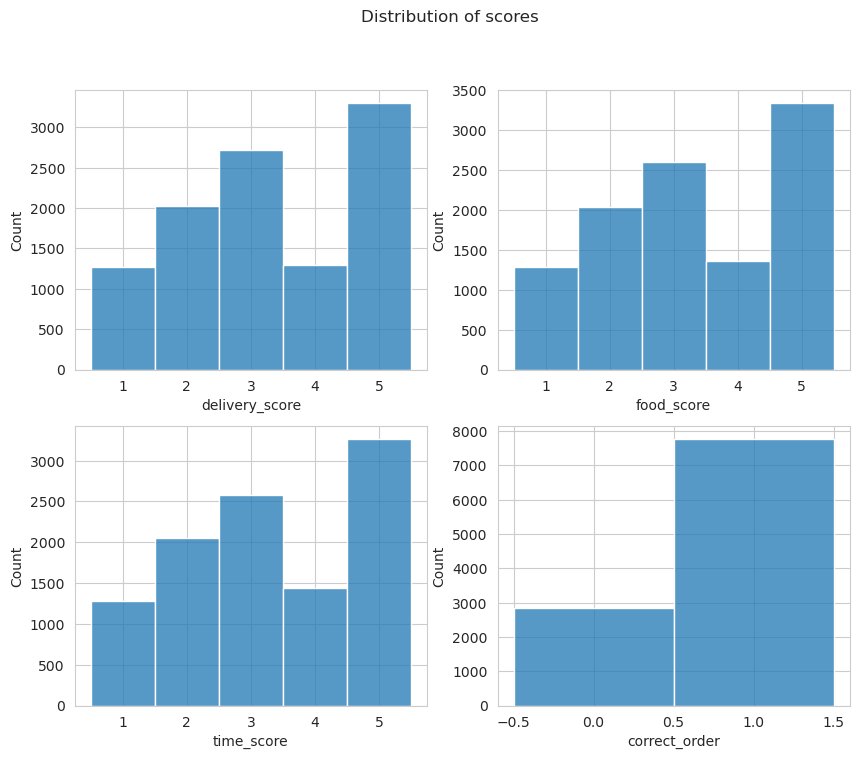

In [9]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=df['delivery_score'], discrete=True, ax=ax[0, 0])
sns.histplot(data=df['food_score'], discrete=True, ax=ax[0, 1])
sns.histplot(data=df['time_score'], discrete=True, ax=ax[1, 0])
sns.histplot(data=df['correct_order'], discrete=True, ax=ax[1, 1])

plt.suptitle('Distribution of scores')
plt.show()

The distribution of the 3 grades is very similar, with the majority of grades being 5. Most of them received the correct orders, we can see on the 4th graph

##  Boxplot of sum scores

In [21]:
df_1 = df[df['correct_order'] == 1]
df_0 = df[df['correct_order'] == 0]
df_1['sum_score'] = df_1.iloc[:, 1:4].sum(axis=1)
df_0['sum_score'] = df_0.iloc[:, 1:4].sum(axis=1)

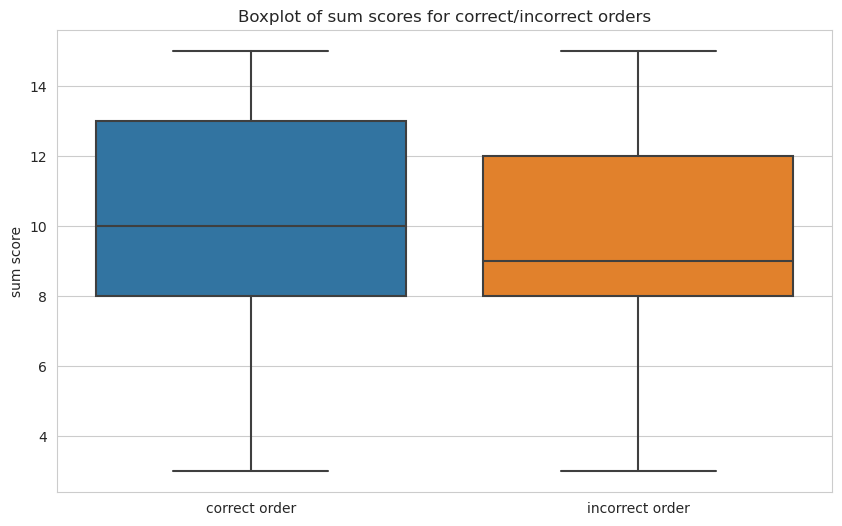

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df_1['sum_score'], df_0['sum_score']])

plt.xticks([0, 1], ['correct order', 'incorrect order'])
plt.ylabel('sum score')
plt.title('Boxplot of sum scores for correct/incorrect orders')

plt.show()

The median in imprecise orders is lower than in precise orders. Also, the interquartile range is tighter. This may be a consequence of the fact that customers tend to underestimate other scores when receiving the wrong order

## Maximum scores

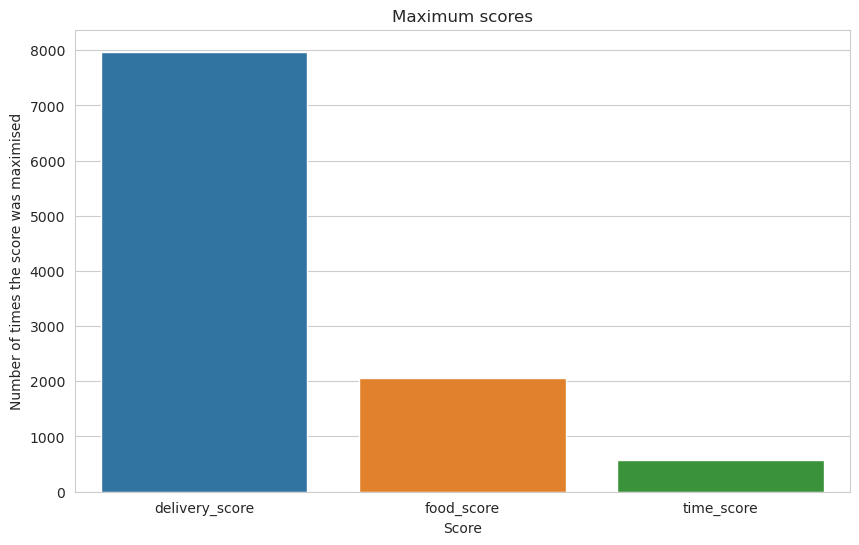

In [40]:
df_max = df.iloc[:, 1:].idxmax(axis=1).value_counts().to_frame().T

plt.figure(figsize=(10, 6))
sns.barplot(data=df_max)

plt.title('Maximum scores')
plt.xlabel('Score')
plt.ylabel('Number of times the score was maximised')

plt.show()

From the graph, we can see that delivery_score has the biggest impact on the customer's total score

# Correlation analysis

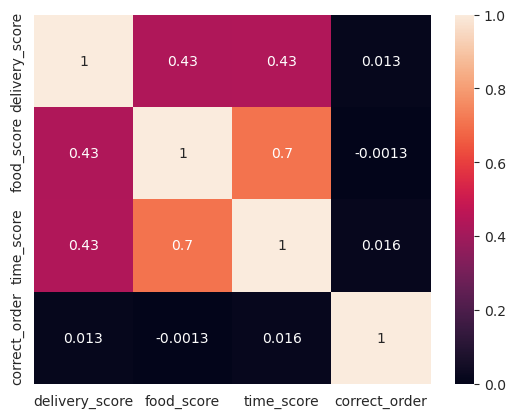

In [25]:
sns.heatmap(data=df.iloc[:, 1:].corr(), annot=True)

plt.show()

Scores on delivery time and food quality are most correlated. This may be due to the fact that the faster the order is delivered, the better the food is saved. Score of delivery quality and food quality are moderately correlated.

# Conclusion

It can be seen that most customers are satisfied with the service and food quality, which is reflected in the high scores. It is also visible that the correctness of order fulfilment strongly influences the overall customer satisfaction.

Interestingly, boxplot shows that when order fulfilment is incorrect, the median total score is lower and the interquartile range is smaller. This is probably due to the fact that customers tend to lower their scores on other criteria if they receive an incorrect order.

The maximum score analysis also shows that the delivery score has the greatest impact on the customer's overall score.

Correlation analysis confirms that delivery time and food quality scores have the highest correlation. This may be because faster delivery favours food quality.

Overall, these results provide useful insights for improving customer service and satisfaction.